In [7]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.8 MB/s eta 0:00:00


In [18]:
# prompt: create students dataframe using pandas where columns names and corresponding data types should be
#  {id:int,
# name:str,
# fathe_name:str,
# course:str,
# duration:str,
# fee:int,
# DOA:date,
# DOB:date}
# now create 100 samples for pakistani students.
# course,duration,fee,DOA,DOB

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create a list of 100 sample data points
data = []
for _ in range(100):
  id = np.random.randint(1, 1000)
  name = f"Student_{id}"
  father_name = f"Father_{id}"
  course = np.random.choice(["Computer Science", "Electrical Engineering", "Mechanical Engineering"])
  duration = np.random.choice(["1 year", "2 years", "3 years"])
  fee = np.random.randint(50000, 200000)
  DOA = datetime(2023, 1, 1) + timedelta(days=np.random.randint(0, 365))
  DOB = datetime(1998, 1, 1) + timedelta(days=np.random.randint(0, 365 * (2023 - 1998)))
  data.append([id, name, father_name, course, duration, fee, DOA.date(), DOB.date()])

# Create the DataFrame
df = pd.DataFrame(data, columns=['id', 'name', 'father_name', 'course', 'duration', 'fee', 'DOA', 'DOB'])

# Set data types
df = df.astype({'id': 'int', 'name': 'str', 'father_name': 'str', 'course': 'str', 'duration': 'str', 'fee': 'int', 'DOA': 'datetime64[ns]', 'DOB': 'datetime64[ns]'})

display(df)


,id,name,father_name,course,duration,fee,DOA,DOB
0,866,Student_866,Father_866,Electrical Engineering,3 years,159096,2023-05-12,2000-07-30
1,258,Student_258,Father_258,Mechanical Engineering,3 years,112756,2023-04-14,2013-07-28
2,91,Student_91,Father_91,Computer Science,3 years,64581,2023-09-26,2016-07-17
3,531,Student_531,Father_531,Computer Science,2 years,162760,2023-06-05,2008-10-24
4,485,Student_485,Father_485,Mechanical Engineering,3 years,179168,2023-06-22,2000-02-12
...,...,...,...,...,...,...,...,...
95,146,Student_146,Father_146,Mechanical Engineering,3 years,170651,2023-04-09,2002-11-10
96,681,Student_681,Father_681,Computer Science,3 years,148190,2023-09-26,2016-05-19
97,676,Student_676,Father_676,Mechanical Engineering,2 years,95870,2023-05-08,2022-05-23
98,756,Student_756,Father_756,Computer Science,2 years,112089,2023-04-25,2007-12-04


In [28]:
df['name']

,name
0,Student_866
1,Student_258
2,Student_91
3,Student_531
4,Student_485
...,...
95,Student_146
96,Student_681
97,Student_676
98,Student_756


In [29]:
df[["id","name"]]

,id,name
0,866,Student_866
1,258,Student_258
2,91,Student_91
3,531,Student_531
4,485,Student_485
...,...,...
95,146,Student_146
96,681,Student_681
97,676,Student_676
98,756,Student_756


'\nDate range for DOA:'

'Min: 2023-01-08 00:00:00'

'Max: 2023-12-23 00:00:00'

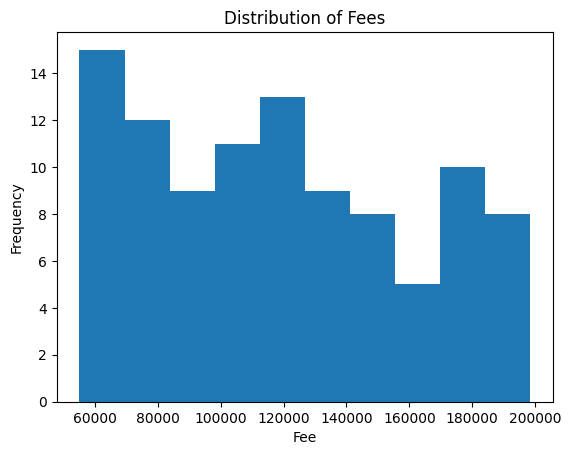

In [40]:
# prompt: perform EDA on above df based on their data types.

# display(df.info())

# # Check basic statistics for numerical columns
# display(df.describe())

# # Explore categorical columns
# display("\nCourse distribution:")
# display(df['course'].value_counts())

# Check for missing values
# display("\nMissing values:")
# display(df.isnull().sum())

# # Analyze date columns
display("\nDate range for DOA:")
display(f"Min: {df['DOA'].min()}")
display(f"Max: {df['DOA'].max()}")

# display("\nDate range for DOB:")
# display(f"Min: {df['DOB'].min()}")
# display(f"Max: {df['DOB'].max()}")

# Visualizations (optional)
import matplotlib.pyplot as plt
plt.hist(df['fee'], bins=10)
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.title('Distribution of Fees')
plt.show()


In [39]:
name = "Qasim"
age = 30
print(f"Pakistan {3 + 20} zinda basd! Welcome dear {df['DOA'].min()}")

Pakistan 23 zinda basd! Welcome dear 2023-01-08 00:00:00


In [41]:
# prompt: create two dataframes df1= create students data and df2=teacher data
# we have to create relation between these dataframes using pandas.
# now create 100 samples for pakistani students.

from faker import Faker
import pandas as pd
import numpy as np

# Create a Faker instance for generating fake data
fake = Faker('en_PK')  # Specify 'en_PK' for Pakistani data

# Create df1: Students Data
student_data = []
for _ in range(100):
  id = np.random.randint(1, 1000)
  name = fake.name()
  father_name = fake.name()
  course = np.random.choice(["Computer Science", "Electrical Engineering", "Mechanical Engineering"])
  duration = np.random.choice(["1 year", "2 years", "3 years"])
  fee = np.random.randint(50000, 200000)
  DOA = fake.date_between(start_date='-1y', end_date='today')
  DOB = fake.date_between(start_date='-30y', end_date='-18y')
  student_data.append([id, name, father_name, course, duration, fee, DOA, DOB])

df1 = pd.DataFrame(student_data, columns=['id', 'name', 'father_name', 'course', 'duration', 'fee', 'DOA', 'DOB'])

# Create df2: Teacher Data
teacher_data = []
for _ in range(10):
  id = np.random.randint(1, 100)
  name = fake.name()
  subject = np.random.choice(["Math", "Physics", "Chemistry", "Computer Science"])
  department = np.random.choice(["Science", "Engineering", "Arts"])
  teacher_data.append([id, name, subject, department])

df2 = pd.DataFrame(teacher_data, columns=['id', 'name', 'subject', 'department'])

# Create a relationship between df1 and df2 (e.g., assign a teacher to each student)
df1['teacher_id'] = np.random.randint(1, 11, size=len(df1))  # Assign random teacher IDs

# Now you can use the 'teacher_id' column to relate students to teachers in df2.

# Display the dataframes
print("Students Dataframe (df1):")
display(df1)
print("\nTeachers Dataframe (df2):")
display(df2)


Students Dataframe (df1):


,id,name,father_name,course,duration,fee,DOA,DOB,teacher_id
0,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9
1,346,Name e,Lateef b,Electrical Engineering,3 years,156707,2024-06-08,2004-12-27,1
2,96,Wadood l,Muzdahir b,Mechanical Engineering,3 years,169872,2024-08-20,2000-11-30,9
3,524,Ibn i,Jabir h,Electrical Engineering,2 years,128597,2024-05-14,2000-09-08,8
4,49,Mourib a,Eshan o,Electrical Engineering,1 year,125005,2024-04-10,2005-06-09,9
...,...,...,...,...,...,...,...,...,...
95,655,Ikrimah a,Nabhan b,Mechanical Engineering,2 years,113863,2024-08-31,1998-02-08,9
96,560,Name b,Aadil j,Mechanical Engineering,2 years,112767,2024-01-31,2001-08-30,1
97,328,Kafeel M,Zafir i,Electrical Engineering,3 years,148413,2024-06-24,2003-10-31,7
98,279,Awlya m,Tamam a,Computer Science,3 years,79547,2024-08-02,1997-12-31,6



Teachers Dataframe (df2):


,id,name,subject,department
0,56,Azban a,Math,Science
1,37,Saim A,Physics,Engineering
2,36,Nadir e,Computer Science,Science
3,87,Ayyubi a,Chemistry,Engineering
4,1,Yaman s,Math,Engineering
5,43,Tahseen L,Chemistry,Arts
6,66,Qadeer l,Math,Engineering
7,31,Rabbani a,Chemistry,Arts
8,47,Quddoos r,Physics,Arts
9,23,Kabeer r,Computer Science,Engineering


In [50]:
df2['id'] = [1,2,3,4,5,11,12,13,14,15]
df2

,id,name,subject,department,salary
0,1,Azban a,Math,Science,2
1,2,Saim A,Physics,Engineering,9
2,3,Nadir e,Computer Science,Science,6
3,4,Ayyubi a,Chemistry,Engineering,6
4,5,Yaman s,Math,Engineering,9
5,11,Tahseen L,Chemistry,Arts,6
6,12,Qadeer l,Math,Engineering,4
7,13,Rabbani a,Chemistry,Arts,4
8,14,Quddoos r,Physics,Arts,3
9,15,Kabeer r,Computer Science,Engineering,9


In [43]:
# prompt: now add address column in students df1

# Create a list to store addresses
addresses = []
for _ in range(len(df1)):
  address = fake.street_address() + ", " + fake.city() + ", " + fake.country()
  addresses.append(address)

# Add the address column to the DataFrame
df1['address'] = addresses

# Display the updated DataFrame
print("Students Dataframe (df1) with address:")
display(df1)


Students Dataframe (df1) with address:


,id,name,father_name,course,duration,fee,DOA,DOB,teacher_id,address
0,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan"
1,346,Name e,Lateef b,Electrical Engineering,3 years,156707,2024-06-08,2004-12-27,1,"45692 Saalim Heights, imouth, Seychelles"
2,96,Wadood l,Muzdahir b,Mechanical Engineering,3 years,169872,2024-08-20,2000-11-30,9,"2306 Zaeem Pass, mside, Bouvet Island (Bouvetoya)"
3,524,Ibn i,Jabir h,Electrical Engineering,2 years,128597,2024-05-14,2000-09-08,8,"78698 a Parkways Suite 454, Port Chawish, Gree..."
4,49,Mourib a,Eshan o,Electrical Engineering,1 year,125005,2024-04-10,2005-06-09,9,"302 m Neck, afurt, Ecuador"
...,...,...,...,...,...,...,...,...,...,...
95,655,Ikrimah a,Nabhan b,Mechanical Engineering,2 years,113863,2024-08-31,1998-02-08,9,"32305 a Mountain, New Ihteshamborough, Reunion"
96,560,Name b,Aadil j,Mechanical Engineering,2 years,112767,2024-01-31,2001-08-30,1,"5504 a Spring Apt. 374, Sadstad, Rwanda"
97,328,Kafeel M,Zafir i,Electrical Engineering,3 years,148413,2024-06-24,2003-10-31,7,"2063 I Corner, East Jahanzebside, Greece"
98,279,Awlya m,Tamam a,Computer Science,3 years,79547,2024-08-02,1997-12-31,6,"8562 l Falls, Port Labeeb, Iran"


In [45]:
# prompt: add salary column in df2

# Add a salary column to df2
df2['salary'] = np.random.randint(1, 10, size=len(df2))

# Display the updated DataFrame
print("\nTeachers Dataframe (df2) with salary:")
display(df2)



Teachers Dataframe (df2) with salary:


,id,name,subject,department,salary
0,56,Azban a,Math,Science,2
1,37,Saim A,Physics,Engineering,9
2,36,Nadir e,Computer Science,Science,6
3,87,Ayyubi a,Chemistry,Engineering,6
4,1,Yaman s,Math,Engineering,9
5,43,Tahseen L,Chemistry,Arts,6
6,66,Qadeer l,Math,Engineering,4
7,31,Rabbani a,Chemistry,Arts,4
8,47,Quddoos r,Physics,Arts,3
9,23,Kabeer r,Computer Science,Engineering,9


In [51]:
# prompt: now create df3 where you have to create inner join df1 and df2.

# Merge df1 and df2 on 'teacher_id'
df3 = pd.merge(df1, df2, left_on='teacher_id', right_on='id', how='inner')

# Display the merged DataFrame
print("\nMerged Dataframe (df3):")
print(len(df3))
display(df3)



Merged Dataframe (df3):
49


,id_x,name_x,father_name,course,duration,fee,DOA,DOB,teacher_id,address,id_y,name_y,subject,department,salary
0,346,Name e,Lateef b,Electrical Engineering,3 years,156707,2024-06-08,2004-12-27,1,"45692 Saalim Heights, imouth, Seychelles",1,Azban a,Math,Science,2
1,230,Name z,Sabahat A,Computer Science,2 years,195682,2024-01-21,2005-06-24,1,"27330 l Glen, New Tajammulfort, British Indian...",1,Azban a,Math,Science,2
2,273,Qahtan i,Nail a,Mechanical Engineering,2 years,162400,2024-02-04,2000-03-31,1,"44922 d Ville, South Daniel, Macao",1,Azban a,Math,Science,2
3,993,Jafar a,Yahyaa Q,Mechanical Engineering,3 years,65280,2024-03-12,1997-07-07,1,"1260 f Tunnel, Lake Nafesa, Montenegro",1,Azban a,Math,Science,2
4,194,Talal v,Izaaz i,Electrical Engineering,1 year,92138,2023-09-19,1998-12-28,1,"65887 Obaid Glens, East Yesoobbury, Paraguay",1,Azban a,Math,Science,2
5,954,Kazim a,Aayan i,Mechanical Engineering,3 years,139892,2024-07-02,1994-12-14,1,"9084 Baleegh Flat Suite 332, Aaqilberg, Equato...",1,Azban a,Math,Science,2
6,533,Tahseen Z,Aamil Z,Mechanical Engineering,3 years,135373,2023-11-10,2003-04-21,1,"68335 Rabee Mountains, bhaven, British Indian ...",1,Azban a,Math,Science,2
7,550,Muhazzim l,Mourib a,Electrical Engineering,3 years,135971,2024-08-10,2003-08-24,1,"694 Yaghnam Green Suite 729, East Mahdichester...",1,Azban a,Math,Science,2
8,466,Batal e,Aatif a,Computer Science,3 years,142804,2024-07-26,2004-10-28,1,"1814 s Overpass, North Nadeem, Azerbaijan",1,Azban a,Math,Science,2
9,804,Rabit f,Rafay a,Electrical Engineering,3 years,96856,2024-01-17,2006-07-06,1,"9598 e Freeway, South Maazinfort, Liberia",1,Azban a,Math,Science,2


In [59]:
# prompt: create df4 merge d1 and df2 with left

# Merge df1 and df2 on 'teacher_id' with a left join
df4 = pd.merge(df1, df2, left_on='teacher_id', right_on='id', how='left')

# Display the merged DataFrame
print("\nMerged Dataframe (df4) with left join:")
print(len(df4))
display(df4)




Merged Dataframe (df4) with left join:
100


,id_x,name_x,father_name,course,duration,fee,DOA,DOB,teacher_id,address,id_y,name_y,subject,department,salary
0,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan",NaN,NaN,NaN,NaN,NaN
1,346,Name e,Lateef b,Electrical Engineering,3 years,156707,2024-06-08,2004-12-27,1,"45692 Saalim Heights, imouth, Seychelles",1.0,Azban a,Math,Science,2.0
2,96,Wadood l,Muzdahir b,Mechanical Engineering,3 years,169872,2024-08-20,2000-11-30,9,"2306 Zaeem Pass, mside, Bouvet Island (Bouvetoya)",NaN,NaN,NaN,NaN,NaN
3,524,Ibn i,Jabir h,Electrical Engineering,2 years,128597,2024-05-14,2000-09-08,8,"78698 a Parkways Suite 454, Port Chawish, Gree...",NaN,NaN,NaN,NaN,NaN
4,49,Mourib a,Eshan o,Electrical Engineering,1 year,125005,2024-04-10,2005-06-09,9,"302 m Neck, afurt, Ecuador",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,655,Ikrimah a,Nabhan b,Mechanical Engineering,2 years,113863,2024-08-31,1998-02-08,9,"32305 a Mountain, New Ihteshamborough, Reunion",NaN,NaN,NaN,NaN,NaN
96,560,Name b,Aadil j,Mechanical Engineering,2 years,112767,2024-01-31,2001-08-30,1,"5504 a Spring Apt. 374, Sadstad, Rwanda",1.0,Azban a,Math,Science,2.0
97,328,Kafeel M,Zafir i,Electrical Engineering,3 years,148413,2024-06-24,2003-10-31,7,"2063 I Corner, East Jahanzebside, Greece",NaN,NaN,NaN,NaN,NaN
98,279,Awlya m,Tamam a,Computer Science,3 years,79547,2024-08-02,1997-12-31,6,"8562 l Falls, Port Labeeb, Iran",NaN,NaN,NaN,NaN,NaN


In [60]:
# prompt: create df4 merge d1 and df2 with left

# Merge df1 and df2 on 'teacher_id' with a left join
df4 = pd.merge(df1, df2, left_on='teacher_id', right_on='id', how='right')

# Display the merged DataFrame
print("\nMerged Dataframe (df4) with left join:")
print(len(df4))
display(df4)




Merged Dataframe (df4) with left join:
54


,id_x,name_x,father_name,course,duration,fee,DOA,DOB,teacher_id,address,id_y,name_y,subject,department,salary
0,346.0,Name e,Lateef b,Electrical Engineering,3 years,156707.0,2024-06-08,2004-12-27,1.0,"45692 Saalim Heights, imouth, Seychelles",1,Azban a,Math,Science,2
1,230.0,Name z,Sabahat A,Computer Science,2 years,195682.0,2024-01-21,2005-06-24,1.0,"27330 l Glen, New Tajammulfort, British Indian...",1,Azban a,Math,Science,2
2,273.0,Qahtan i,Nail a,Mechanical Engineering,2 years,162400.0,2024-02-04,2000-03-31,1.0,"44922 d Ville, South Daniel, Macao",1,Azban a,Math,Science,2
3,993.0,Jafar a,Yahyaa Q,Mechanical Engineering,3 years,65280.0,2024-03-12,1997-07-07,1.0,"1260 f Tunnel, Lake Nafesa, Montenegro",1,Azban a,Math,Science,2
4,194.0,Talal v,Izaaz i,Electrical Engineering,1 year,92138.0,2023-09-19,1998-12-28,1.0,"65887 Obaid Glens, East Yesoobbury, Paraguay",1,Azban a,Math,Science,2
5,954.0,Kazim a,Aayan i,Mechanical Engineering,3 years,139892.0,2024-07-02,1994-12-14,1.0,"9084 Baleegh Flat Suite 332, Aaqilberg, Equato...",1,Azban a,Math,Science,2
6,533.0,Tahseen Z,Aamil Z,Mechanical Engineering,3 years,135373.0,2023-11-10,2003-04-21,1.0,"68335 Rabee Mountains, bhaven, British Indian ...",1,Azban a,Math,Science,2
7,550.0,Muhazzim l,Mourib a,Electrical Engineering,3 years,135971.0,2024-08-10,2003-08-24,1.0,"694 Yaghnam Green Suite 729, East Mahdichester...",1,Azban a,Math,Science,2
8,466.0,Batal e,Aatif a,Computer Science,3 years,142804.0,2024-07-26,2004-10-28,1.0,"1814 s Overpass, North Nadeem, Azerbaijan",1,Azban a,Math,Science,2
9,804.0,Rabit f,Rafay a,Electrical Engineering,3 years,96856.0,2024-01-17,2006-07-06,1.0,"9598 e Freeway, South Maazinfort, Liberia",1,Azban a,Math,Science,2


In [54]:
# prompt: create df4 merge d1 and df2 with left

# Merge df1 and df2 on 'teacher_id' with a left join
df4 = pd.merge(df1, df2, left_on='teacher_id', right_on='id', how='outer')

# Display the merged DataFrame
print("\nMerged Dataframe (df4) with left join:")
print(len(df4))
display(df4)




Merged Dataframe (df4) with left join:
105


,id_x,name_x,father_name,course,duration,fee,DOA,DOB,teacher_id,address,id_y,name_y,subject,department,salary
0,576.0,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851.0,2023-09-20,2000-06-17,9.0,"393 a Well, Port Yaqeen, Azerbaijan",NaN,NaN,NaN,NaN,NaN
1,96.0,Wadood l,Muzdahir b,Mechanical Engineering,3 years,169872.0,2024-08-20,2000-11-30,9.0,"2306 Zaeem Pass, mside, Bouvet Island (Bouvetoya)",NaN,NaN,NaN,NaN,NaN
2,49.0,Mourib a,Eshan o,Electrical Engineering,1 year,125005.0,2024-04-10,2005-06-09,9.0,"302 m Neck, afurt, Ecuador",NaN,NaN,NaN,NaN,NaN
3,935.0,Kawthar i,Yaqub j,Electrical Engineering,3 years,125013.0,2024-08-29,2001-12-25,9.0,"5998 a Ferry, North Loot, Iran",NaN,NaN,NaN,NaN,NaN
4,767.0,Omran a,Qays a,Computer Science,3 years,122324.0,2024-05-03,2005-02-08,9.0,"5292 Faizan Roads, New Azeeb, Guernsey",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,Tahseen L,Chemistry,Arts,6.0
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,Qadeer l,Math,Engineering,4.0
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Rabbani a,Chemistry,Arts,4.0
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Quddoos r,Physics,Arts,3.0


In [58]:
# prompt: create cross join between df1 and df2

# Create a cross join between df1 and df2
df_cross = df1.merge(df2, how='cross')

# Display the cross-joined DataFrame
print("\nCross-joined Dataframe:")
print(len(df_cross))
display(df_cross)



Cross-joined Dataframe:
1000


,id_x,name_x,father_name,course,duration,fee,DOA,DOB,teacher_id,address,id_y,name_y,subject,department,salary
0,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan",1,Azban a,Math,Science,2
1,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan",2,Saim A,Physics,Engineering,9
2,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan",3,Nadir e,Computer Science,Science,6
3,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan",4,Ayyubi a,Chemistry,Engineering,6
4,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan",5,Yaman s,Math,Engineering,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,182,Zayan i,Attaf a,Computer Science,3 years,61134,2024-03-19,1995-06-09,10,"8267 Ubaadah Parkway, Talhahbury, Malta",11,Tahseen L,Chemistry,Arts,6
996,182,Zayan i,Attaf a,Computer Science,3 years,61134,2024-03-19,1995-06-09,10,"8267 Ubaadah Parkway, Talhahbury, Malta",12,Qadeer l,Math,Engineering,4
997,182,Zayan i,Attaf a,Computer Science,3 years,61134,2024-03-19,1995-06-09,10,"8267 Ubaadah Parkway, Talhahbury, Malta",13,Rabbani a,Chemistry,Arts,4
998,182,Zayan i,Attaf a,Computer Science,3 years,61134,2024-03-19,1995-06-09,10,"8267 Ubaadah Parkway, Talhahbury, Malta",14,Quddoos r,Physics,Arts,3


In [61]:
df1

,id,name,father_name,course,duration,fee,DOA,DOB,teacher_id,address
0,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan"
1,346,Name e,Lateef b,Electrical Engineering,3 years,156707,2024-06-08,2004-12-27,1,"45692 Saalim Heights, imouth, Seychelles"
2,96,Wadood l,Muzdahir b,Mechanical Engineering,3 years,169872,2024-08-20,2000-11-30,9,"2306 Zaeem Pass, mside, Bouvet Island (Bouvetoya)"
3,524,Ibn i,Jabir h,Electrical Engineering,2 years,128597,2024-05-14,2000-09-08,8,"78698 a Parkways Suite 454, Port Chawish, Gree..."
4,49,Mourib a,Eshan o,Electrical Engineering,1 year,125005,2024-04-10,2005-06-09,9,"302 m Neck, afurt, Ecuador"
...,...,...,...,...,...,...,...,...,...,...
95,655,Ikrimah a,Nabhan b,Mechanical Engineering,2 years,113863,2024-08-31,1998-02-08,9,"32305 a Mountain, New Ihteshamborough, Reunion"
96,560,Name b,Aadil j,Mechanical Engineering,2 years,112767,2024-01-31,2001-08-30,1,"5504 a Spring Apt. 374, Sadstad, Rwanda"
97,328,Kafeel M,Zafir i,Electrical Engineering,3 years,148413,2024-06-24,2003-10-31,7,"2063 I Corner, East Jahanzebside, Greece"
98,279,Awlya m,Tamam a,Computer Science,3 years,79547,2024-08-02,1997-12-31,6,"8562 l Falls, Port Labeeb, Iran"


In [63]:
# prompt: now create new column in df1 column name "message" where we have to use name, father_name and DOA for admission successfully done.

df1['message'] = "Dear " + df1['name'] + ",\nCongratulations! Your admission is successfully done.\nYour father's name is " + df1['father_name'] + " and your admission date is " + df1['DOA'].astype(str) + "."
df1

,id,name,father_name,course,duration,fee,DOA,DOB,teacher_id,address,message
0,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan","Dear Iftikhaar s,\nCongratulations! Your admis..."
1,346,Name e,Lateef b,Electrical Engineering,3 years,156707,2024-06-08,2004-12-27,1,"45692 Saalim Heights, imouth, Seychelles","Dear Name e,\nCongratulations! Your admission ..."
2,96,Wadood l,Muzdahir b,Mechanical Engineering,3 years,169872,2024-08-20,2000-11-30,9,"2306 Zaeem Pass, mside, Bouvet Island (Bouvetoya)","Dear Wadood l,\nCongratulations! Your admissio..."
3,524,Ibn i,Jabir h,Electrical Engineering,2 years,128597,2024-05-14,2000-09-08,8,"78698 a Parkways Suite 454, Port Chawish, Gree...","Dear Ibn i,\nCongratulations! Your admission i..."
4,49,Mourib a,Eshan o,Electrical Engineering,1 year,125005,2024-04-10,2005-06-09,9,"302 m Neck, afurt, Ecuador","Dear Mourib a,\nCongratulations! Your admissio..."
...,...,...,...,...,...,...,...,...,...,...,...
95,655,Ikrimah a,Nabhan b,Mechanical Engineering,2 years,113863,2024-08-31,1998-02-08,9,"32305 a Mountain, New Ihteshamborough, Reunion","Dear Ikrimah a,\nCongratulations! Your admissi..."
96,560,Name b,Aadil j,Mechanical Engineering,2 years,112767,2024-01-31,2001-08-30,1,"5504 a Spring Apt. 374, Sadstad, Rwanda","Dear Name b,\nCongratulations! Your admission ..."
97,328,Kafeel M,Zafir i,Electrical Engineering,3 years,148413,2024-06-24,2003-10-31,7,"2063 I Corner, East Jahanzebside, Greece","Dear Kafeel M,\nCongratulations! Your admissio..."
98,279,Awlya m,Tamam a,Computer Science,3 years,79547,2024-08-02,1997-12-31,6,"8562 l Falls, Port Labeeb, Iran","Dear Awlya m,\nCongratulations! Your admission..."


In [66]:
df1['message'].values[0]

"Dear Iftikhaar s,\nCongratulations! Your admission is successfully done.\nYour father's name is Ubaidah r and your admission date is 2023-09-20."

In [76]:
# prompt: now create new column in df1 column name "message1" where we have to use name, father_name and DOA for admission successfully done.
# you have to use custom function for this purpose, you will use .apply method to complete this task. also give 10% discount in their fee. you have to show old and discounted fee in message.

def create_message(row):
  """
  Creates a message with the student's name, father's name, and date of admission.
  Also calculates the discounted fee.
  """
  name = row['name']
  father_name = row['father_name']
  DOA = row['DOA'].strftime('%Y-%m-%d')
  old_fee = row['fee']
  discounted_fee = old_fee * 0.9  # 10% discount
  message = f"Dear {name},\nCongratulations! Your admission is successfully done.\nYour father's name is {father_name} and your admission date is {DOA}.\nYour original fee was {old_fee} and with a 10% discount, your new fee is {discounted_fee}."
  return message

# Apply the function to create the 'message1' column
df1['message1'] = df1.apply(create_message, axis=1)

# Display the updated DataFrame
display(df1)


,id,name,father_name,course,duration,fee,DOA,DOB,teacher_id,address,message,message1,discounted_fee,original_fee
0,576,Iftikhaar s,Ubaidah r,Mechanical Engineering,3 years,53851,2023-09-20,2000-06-17,9,"393 a Well, Port Yaqeen, Azerbaijan","Dear Iftikhaar s,\nCongratulations! Your admis...","Dear Iftikhaar s,\nCongratulations! Your admis...",48465.9,53851
1,346,Name e,Lateef b,Electrical Engineering,3 years,156707,2024-06-08,2004-12-27,1,"45692 Saalim Heights, imouth, Seychelles","Dear Name e,\nCongratulations! Your admission ...","Dear Name e,\nCongratulations! Your admission ...",141036.3,156707
2,96,Wadood l,Muzdahir b,Mechanical Engineering,3 years,169872,2024-08-20,2000-11-30,9,"2306 Zaeem Pass, mside, Bouvet Island (Bouvetoya)","Dear Wadood l,\nCongratulations! Your admissio...","Dear Wadood l,\nCongratulations! Your admissio...",152884.8,169872
3,524,Ibn i,Jabir h,Electrical Engineering,2 years,128597,2024-05-14,2000-09-08,8,"78698 a Parkways Suite 454, Port Chawish, Gree...","Dear Ibn i,\nCongratulations! Your admission i...","Dear Ibn i,\nCongratulations! Your admission i...",115737.3,128597
4,49,Mourib a,Eshan o,Electrical Engineering,1 year,125005,2024-04-10,2005-06-09,9,"302 m Neck, afurt, Ecuador","Dear Mourib a,\nCongratulations! Your admissio...","Dear Mourib a,\nCongratulations! Your admissio...",112504.5,125005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,655,Ikrimah a,Nabhan b,Mechanical Engineering,2 years,113863,2024-08-31,1998-02-08,9,"32305 a Mountain, New Ihteshamborough, Reunion","Dear Ikrimah a,\nCongratulations! Your admissi...","Dear Ikrimah a,\nCongratulations! Your admissi...",102476.7,113863
96,560,Name b,Aadil j,Mechanical Engineering,2 years,112767,2024-01-31,2001-08-30,1,"5504 a Spring Apt. 374, Sadstad, Rwanda","Dear Name b,\nCongratulations! Your admission ...","Dear Name b,\nCongratulations! Your admission ...",101490.3,112767
97,328,Kafeel M,Zafir i,Electrical Engineering,3 years,148413,2024-06-24,2003-10-31,7,"2063 I Corner, East Jahanzebside, Greece","Dear Kafeel M,\nCongratulations! Your admissio...","Dear Kafeel M,\nCongratulations! Your admissio...",133571.7,148413
98,279,Awlya m,Tamam a,Computer Science,3 years,79547,2024-08-02,1997-12-31,6,"8562 l Falls, Port Labeeb, Iran","Dear Awlya m,\nCongratulations! Your admission...","Dear Awlya m,\nCongratulations! Your admission...",71592.3,79547


In [77]:
df1['message1'].values[0]

"Dear Iftikhaar s,\nCongratulations! Your admission is successfully done.\nYour father's name is Ubaidah r and your admission date is 2023-09-20.\nYour original fee was 53851 and with a 10% discount, your new fee is 48465.9."

In [79]:
# prompt: now convert df1 dataframe into polars python package dataframe.

!pip install polars

import polars as pl

# Convert pandas DataFrame to polars DataFrame
df1_polars = pl.DataFrame(df1)

# Display the polars DataFrame
print("Polars DataFrame (df1_polars):")
display(df1_polars)


Polars DataFrame (df1_polars):


id,name,father_name,course,duration,fee,DOA,DOB,teacher_id,address,message,message1,discounted_fee,original_fee
i64,str,str,str,str,i64,date,date,i64,str,str,str,f64,i64
576,"""Iftikhaar s""","""Ubaidah r""","""Mechanical Eng…","""3 years""",53851,2023-09-20,2000-06-17,9,"""393 a Well, Po…","""Dear Iftikhaar…","""Dear Iftikhaar…",48465.9,53851
346,"""Name e""","""Lateef b""","""Electrical Eng…","""3 years""",156707,2024-06-08,2004-12-27,1,"""45692 Saalim H…","""Dear Name e, C…","""Dear Name e, C…",141036.3,156707
96,"""Wadood l""","""Muzdahir b""","""Mechanical Eng…","""3 years""",169872,2024-08-20,2000-11-30,9,"""2306 Zaeem Pas…","""Dear Wadood l,…","""Dear Wadood l,…",152884.8,169872
524,"""Ibn i""","""Jabir h""","""Electrical Eng…","""2 years""",128597,2024-05-14,2000-09-08,8,"""78698 a Parkwa…","""Dear Ibn i, Co…","""Dear Ibn i, Co…",115737.3,128597
49,"""Mourib a""","""Eshan o""","""Electrical Eng…","""1 year""",125005,2024-04-10,2005-06-09,9,"""302 m Neck, af…","""Dear Mourib a,…","""Dear Mourib a,…",112504.5,125005
56,"""Kaashif b""","""Lajlaj d""","""Electrical Eng…","""2 years""",140718,2023-12-24,2006-02-18,3,"""68432 N Trace …","""Dear Kaashif b…","""Dear Kaashif b…",126646.2,140718
76,"""Wahhaab a""","""Najeeb r""","""Electrical Eng…","""2 years""",184048,2023-11-11,1997-01-09,2,"""1524 m Inlet A…","""Dear Wahhaab a…","""Dear Wahhaab a…",165643.2,184048
427,"""Nabil a""","""Qaseem r""","""Electrical Eng…","""1 year""",172394,2024-07-27,2003-09-24,4,"""0666 a Loaf Ap…","""Dear Nabil a, …","""Dear Nabil a, …",155154.6,172394
935,"""Kawthar i""","""Yaqub j""","""Electrical Eng…","""3 years""",125013,2024-08-29,2001-12-25,9,"""5998 a Ferry, …","""Dear Kawthar i…","""Dear Kawthar i…",112511.7,125013


In [80]:
# prompt: i have to teach pandas series can create step by step its methods and attributes examples.

# Creating a Pandas Series
import pandas as pd

# From a list
data = [10, 20, 30, 40, 50]
series = pd.Series(data)
print("Series from a list:\n", series)

# From a NumPy array
import numpy as np
data = np.array([10, 20, 30, 40, 50])
series = pd.Series(data)
print("\nSeries from a NumPy array:\n", series)

# With custom index
data = [10, 20, 30, 40, 50]
index = ['a', 'b', 'c', 'd', 'e']
series = pd.Series(data, index=index)
print("\nSeries with custom index:\n", series)

# From a dictionary
data = {'a': 10, 'b': 20, 'c': 30}
series = pd.Series(data)
print("\nSeries from a dictionary:\n", series)

# Accessing elements
print("\nAccessing elements:")
print(series['a'])  # Access by index label
print(series[0])   # Access by position

# Series attributes
print("\nSeries attributes:")
print("Index:", series.index)
print("Values:", series.values)
print("Data type:", series.dtype)
print("Shape:", series.shape)

# Series methods
print("\nSeries methods:")

# Head and tail
print("\nHead:\n", series.head(2))  # First 2 elements
print("\nTail:\n", series.tail(2))  # Last 2 elements

# Descriptive statistics
print("\nDescriptive statistics:\n", series.describe())

# Sorting
series_sorted = series.sort_values()
print("\nSorted series:\n", series_sorted)

# Filtering
filtered_series = series[series > 20]
print("\nFiltered series:\n", filtered_series)

# Applying functions
def square(x):
  return x * x

squared_series = series.apply(square)
print("\nSquared series:\n", squared_series)

# Missing values
data = [10, 20, np.nan, 40, 50]
series = pd.Series(data)
print("\nSeries with missing values:\n", series)

# Handling missing values
print("\nDropping missing values:\n", series.dropna())
print("\nFilling missing values:\n", series.fillna(0))

# Concatenation
series1 = pd.Series([1, 2, 3])
series2 = pd.Series([4, 5, 6])
concatenated_series = pd.concat([series1, series2])
print("\nConcatenated series:\n", concatenated_series)


Series from a list:
 0    10
1    20
2    30
3    40
4    50
dtype: int64

Series from a NumPy array:
 0    10
1    20
2    30
3    40
4    50
dtype: int64

Series with custom index:
 a    10
b    20
c    30
d    40
e    50
dtype: int64

Series from a dictionary:
 a    10
b    20
c    30
dtype: int64

Accessing elements:
10
10

Series attributes:
Index: Index(['a', 'b', 'c'], dtype='object')
Values: [10 20 30]
Data type: int64
Shape: (3,)

Series methods:

Head:
 a    10
b    20
dtype: int64

Tail:
 b    20
c    30
dtype: int64

Descriptive statistics:
 count     3.0
mean     20.0
std      10.0
min      10.0
25%      15.0
50%      20.0
75%      25.0
max      30.0
dtype: float64

Sorted series:
 a    10
b    20
c    30
dtype: int64

Filtered series:
 c    30
dtype: int64

Squared series:
 a    100
b    400
c    900
dtype: int64

Series with missing values:
 0    10.0
1    20.0
2     NaN
3    40.0
4    50.0
dtype: float64

Dropping missing values:
 0    10.0
1    20.0
3    40.0
4    50.0

<ipython-input-80-185018fc851c>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(series[0])   # Access by position


In [81]:
# prompt: i have to teach pandas dataframe can create step by step its methods and attributes examples.

# Creating a Pandas DataFrame

# 1. From a list of lists
data = [
    ['Alice', 25, 'Female'],
    ['Bob', 30, 'Male'],
    ['Charlie', 28, 'Male']
]
df = pd.DataFrame(data, columns=['Name', 'Age', 'Gender'])
print("DataFrame from a list of lists:\n", df)

# 2. From a dictionary of lists
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 28],
    'Gender': ['Female', 'Male', 'Male']
}
df = pd.DataFrame(data)
print("\nDataFrame from a dictionary of lists:\n", df)

# 3. From a list of dictionaries
data = [
    {'Name': 'Alice', 'Age': 25, 'Gender': 'Female'},
    {'Name': 'Bob', 'Age': 30, 'Gender': 'Male'},
    {'Name': 'Charlie', 'Age': 28, 'Gender': 'Male'}
]
df = pd.DataFrame(data)
print("\nDataFrame from a list of dictionaries:\n", df)

# 4. From a NumPy array
data = np.array([
    ['Alice', 25, 'Female'],
    ['Bob', 30, 'Male'],
    ['Charlie', 28, 'Male']
])
df = pd.DataFrame(data, columns=['Name', 'Age', 'Gender'])
print("\nDataFrame from a NumPy array:\n", df)

# DataFrame Attributes

print("\nDataFrame attributes:")
print("Shape:", df.shape)  # Returns the dimensions of the DataFrame (rows, columns)
print("Index:", df.index)  # Returns the row labels
print("Columns:", df.columns)  # Returns the column labels
print("Values:", df.values)  # Returns the underlying NumPy array
print("Data types:", df.dtypes)  # Returns the data type of each column

# DataFrame Methods

print("\nDataFrame methods:")

# Accessing data
print("\nAccessing columns:")
print(df['Name'])  # Access a single column as a Series
print(df[['Name', 'Age']])  # Access multiple columns as a DataFrame

print("\nAccessing rows:")
print(df.iloc[0])  # Access a row by its integer position
print(df.loc[0])  # Access a row by its index label

# Head and tail
print("\nHead:\n", df.head(2))  # First 2 rows
print("\nTail:\n", df.tail(2))  # Last 2 rows

# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())  # Summary statistics for numerical columns

# Sorting
df_sorted = df.sort_values(by='Age')  # Sort by a column
print("\nSorted DataFrame:\n", df_sorted)

# Filtering
filtered_df = df[df['Age'] > 28]  # Filter rows based on a condition
print("\nFiltered DataFrame:\n", filtered_df)

# Adding and removing columns
df['City'] = ['New York', 'London', 'Paris']  # Add a new column
print("\nDataFrame with new column:\n", df)
df = df.drop('City', axis=1)  # Remove a column
print("\nDataFrame after dropping column:\n", df)

# Grouping and aggregation
grouped_df = df.groupby('Gender')['Age'].mean()  # Group by a column and calculate the mean of another column
print("\nGrouped DataFrame:\n", grouped_df)

# Handling missing values
data = [
    ['Alice', 25, 'Female'],
    ['Bob', 30, 'Male'],
    ['Charlie', np.nan, 'Male']
]
df = pd.DataFrame(data, columns=['Name', 'Age', 'Gender'])
print("\nDataFrame with missing values:\n", df)

print("\nDropping missing values:\n", df.dropna())  # Drop rows with missing values
print("\nFilling missing values:\n", df.fillna(0))  # Fill missing values with a specific value

# Merging DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [1, 2, 4], 'City': ['New York', 'London', 'Paris']})
merged_df = pd.merge(df1, df2, on='ID', how='inner')  # Merge DataFrames based on a common column
print("\nMerged DataFrame:\n", merged_df)

# Transposing
print("\nTransposed DataFrame:\n", df.transpose())  # Transpose the DataFrame

# Applying functions
def square(x):
  return x * x

df['Age_squared'] = df['Age'].apply(square)  # Apply a function to a column
print("\nDataFrame with applied function:\n", df)


DataFrame from a list of lists:
       Name  Age  Gender
0    Alice   25  Female
1      Bob   30    Male
2  Charlie   28    Male

DataFrame from a dictionary of lists:
       Name  Age  Gender
0    Alice   25  Female
1      Bob   30    Male
2  Charlie   28    Male

DataFrame from a list of dictionaries:
       Name  Age  Gender
0    Alice   25  Female
1      Bob   30    Male
2  Charlie   28    Male

DataFrame from a NumPy array:
       Name Age  Gender
0    Alice  25  Female
1      Bob  30    Male
2  Charlie  28    Male

DataFrame attributes:
Shape: (3, 3)
Index: RangeIndex(start=0, stop=3, step=1)
Columns: Index(['Name', 'Age', 'Gender'], dtype='object')
Values: [['Alice' '25' 'Female']
 ['Bob' '30' 'Male']
 ['Charlie' '28' 'Male']]
Data types: Name      object
Age       object
Gender    object
dtype: object

DataFrame methods:

Accessing columns:
0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object
      Name Age
0    Alice  25
1      Bob  30
2  Charlie  28

Accessing row

TypeError: '>' not supported between instances of 'str' and 'int'

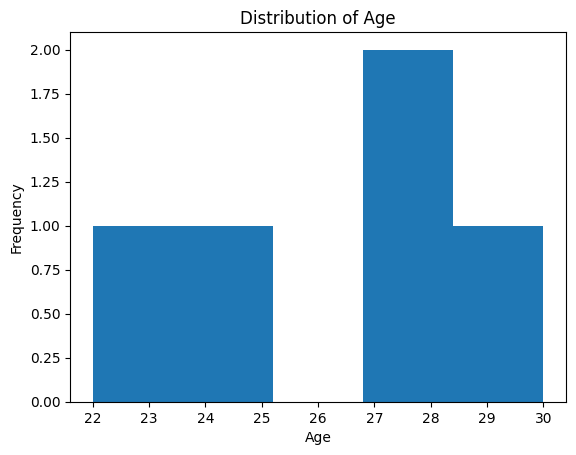

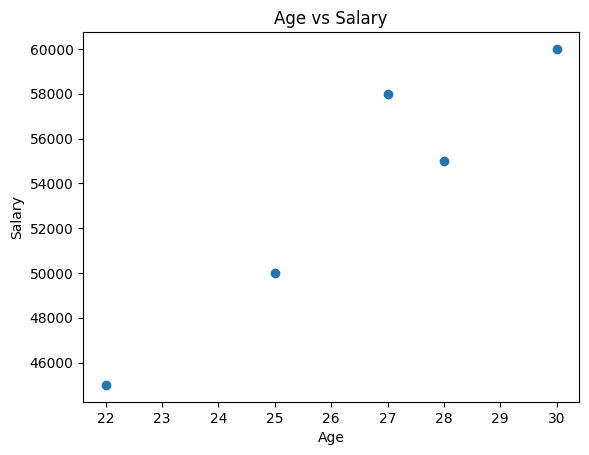

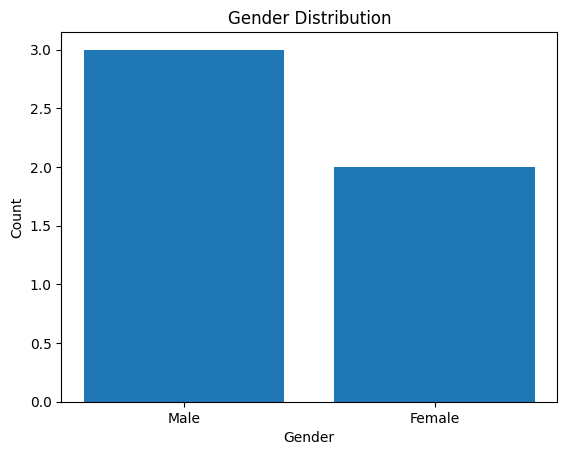

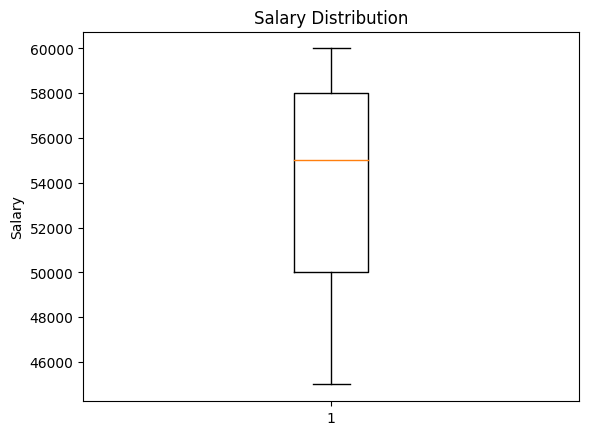

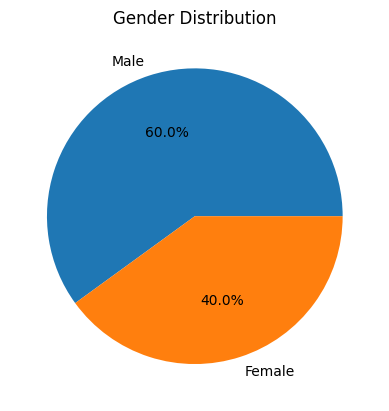

In [82]:
# prompt: i have to teach matplot lib data visualization pandas defualt function can you create possible example for me.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 28, 22, 27],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 55000, 45000, 58000]
}
df = pd.DataFrame(data)

# 1. Histogram
plt.hist(df['Age'], bins=5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# 2. Scatter plot
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

# 3. Bar chart
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# 4. Box plot
plt.boxplot(df['Salary'])
plt.ylabel('Salary')
plt.title('Salary Distribution')
plt.show()

# 5. Pie chart
course_counts = df['Gender'].value_counts()
plt.pie(course_counts.values, labels=course_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

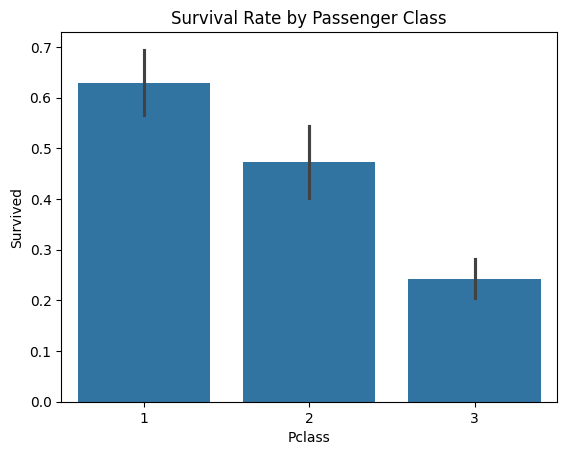

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


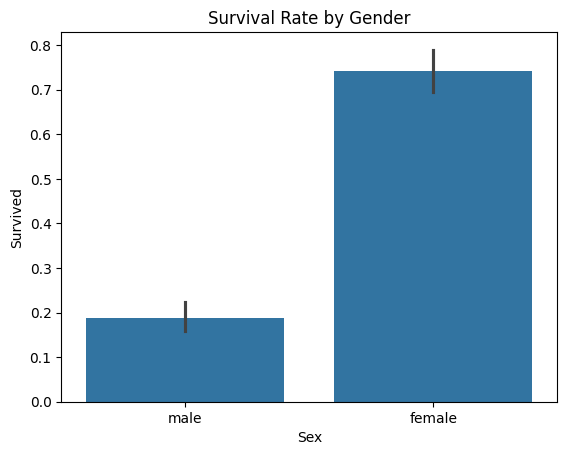

<ipython-input-83-2bcffd6b996b>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age_group')['Survived'].mean())


Age_group
Child          0.503597
Young Adult    0.331096
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64


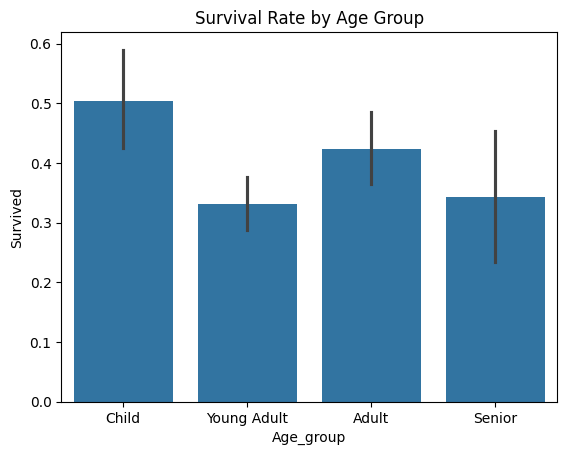

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


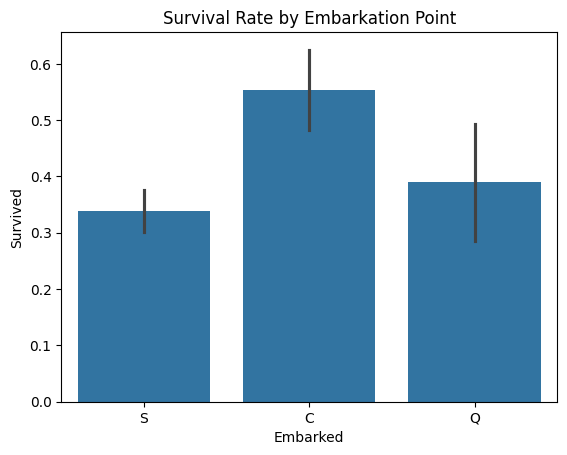

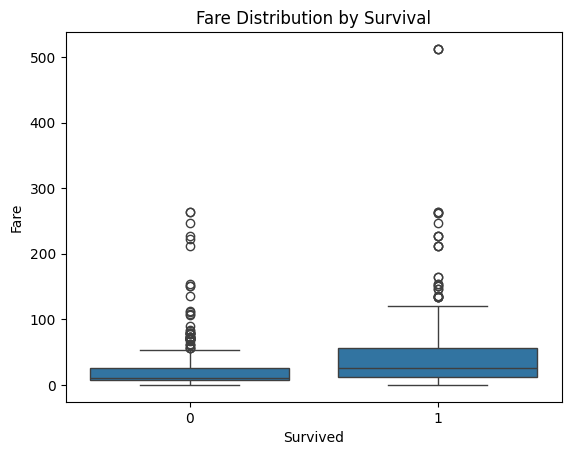

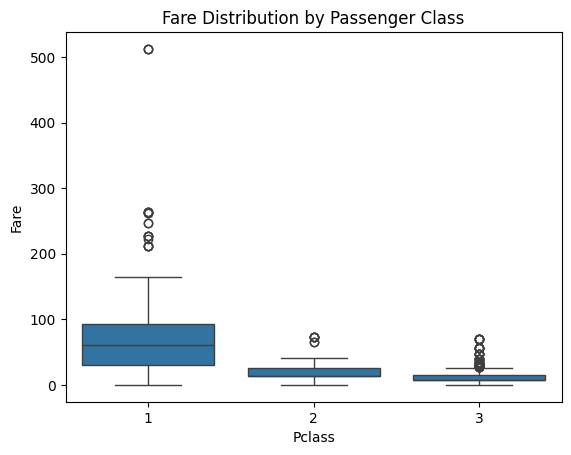

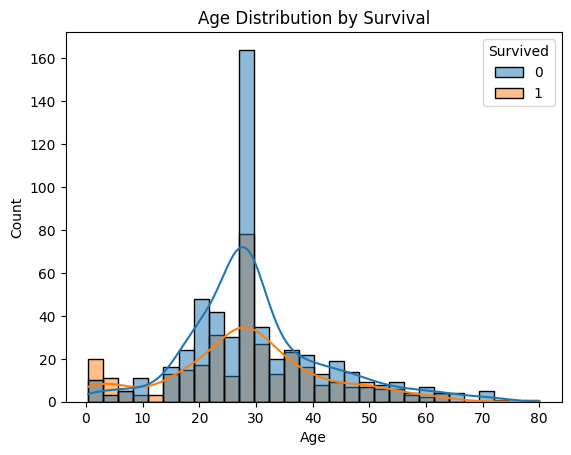

{'Title': 'The Titanic Tragedy: A Data-Driven Narrative', 'Introduction': "The sinking of the RMS Titanic remains one of history's most tragic events. This analysis explores the factors that influenced survival on that fateful night.", 'Key Findings': ['Women and children had a higher survival rate than men.', 'Passengers in higher classes (1st and 2nd) had a better chance of survival.', 'Age played a significant role, with children and younger adults having a higher survival rate.', 'Fare might have influenced survival, as those who paid higher fares tended to have better access to lifeboats.', 'Embarkation point had a slight impact on survival rates.'], 'Visualizations': ['Bar chart showing survival rate by passenger class.', 'Bar chart showing survival rate by gender.', 'Bar chart showing survival rate by age group.', 'Bar chart showing survival rate by embarkation point.', 'Box plot showing the relationship between fare and survival.', 'Box plot showing the relationship between pas

In [83]:
# prompt: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv you are data scientist now you have to perform data analysis on this data then create story telling dic.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Analyze survival rate by passenger class
print(df.groupby('Pclass')['Survived'].mean())

# Visualize survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Analyze survival rate by gender
print(df.groupby('Sex')['Survived'].mean())

# Visualize survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Analyze survival rate by age
df['Age_group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
print(df.groupby('Age_group')['Survived'].mean())

# Visualize survival rate by age group
sns.barplot(x='Age_group', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

# Analyze survival rate by embarkation point
print(df.groupby('Embarked')['Survived'].mean())

# Visualize survival rate by embarkation point
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.show()

# Analyze the relationship between fare and survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

# Analyze the relationship between passenger class and fare
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Analyze the relationship between age and survival
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# Story Telling Dictionary
story_telling_dict = {
    "Title": "The Titanic Tragedy: A Data-Driven Narrative",
    "Introduction": "The sinking of the RMS Titanic remains one of history's most tragic events. This analysis explores the factors that influenced survival on that fateful night.",
    "Key Findings": [
        "Women and children had a higher survival rate than men.",
        "Passengers in higher classes (1st and 2nd) had a better chance of survival.",
        "Age played a significant role, with children and younger adults having a higher survival rate.",
        "Fare might have influenced survival, as those who paid higher fares tended to have better access to lifeboats.",
        "Embarkation point had a slight impact on survival rates."
    ],
    "Visualizations": [
        "Bar chart showing survival rate by passenger class.",
        "Bar chart showing survival rate by gender.",
        "Bar chart showing survival rate by age group.",
        "Bar chart showing survival rate by embarkation point.",
        "Box plot showing the relationship between fare and survival.",
        "Box plot showing the relationship between passenger class and fare.",
        "Histogram showing the relationship between age and survival."
    ],
    "Conclusion": "This analysis reveals that social class, gender, and age were crucial factors determining survival on the Titanic.  The tragedy highlighted the inequalities of the time and the importance of prioritizing vulnerable populations in emergencies."
}

print(story_telling_dict)


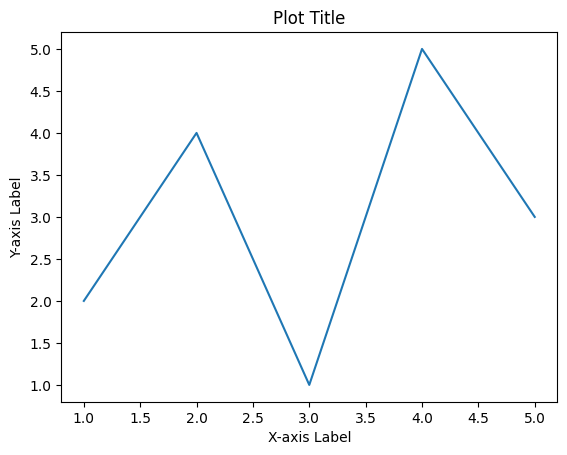

In [1]:
# prompt: i have to teach matplotlib create steps for me.

# Matplotlib Tutorial: Creating Plots Step-by-Step

# 1. Import Matplotlib
import matplotlib.pyplot as plt

# 2. Prepare Data
#   - You'll need data to plot, such as lists, arrays, or Pandas DataFrames.
x = [1, 2, 3, 4, 5]  # Example x-axis data
y = [2, 4, 1, 5, 3]  # Example y-axis data

# 3. Create a Figure and Axes
#   - A figure is the overall container for your plot.
#   - Axes are the individual plots within the figure.
fig, ax = plt.subplots()  # Create a figure and an axes object

# 4. Plot the Data
#   - Use the appropriate plotting function based on the type of plot you want.
ax.plot(x, y)  # Create a line plot

# 5. Customize the Plot (Optional)
#   - Add labels, titles, legends, etc., to make your plot more informative.
ax.set_xlabel('X-axis Label')  # Set x-axis label
ax.set_ylabel('Y-axis Label')  # Set y-axis label
ax.set_title('Plot Title')  # Set plot title

# 6. Display the Plot
plt.show()  # Show the plot


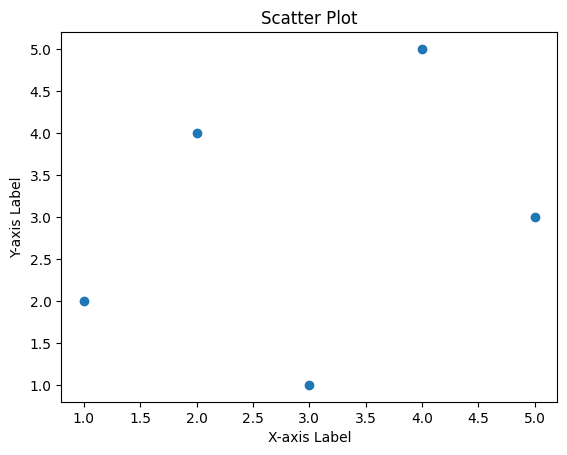

In [2]:


# Example: Creating a Scatter Plot
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

fig, ax = plt.subplots()
ax.scatter(x, y)  # Create a scatter plot
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Scatter Plot')
plt.show()



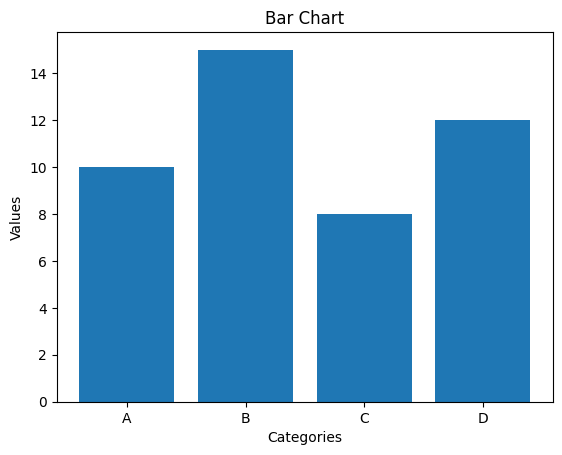

In [3]:

# Example: Creating a Bar Chart
import matplotlib.pyplot as plt

categories = ['A', 'B', 'C', 'D']
values = [10, 15, 8, 12]

fig, ax = plt.subplots()
ax.bar(categories, values)  # Create a bar chart
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart')
plt.show()


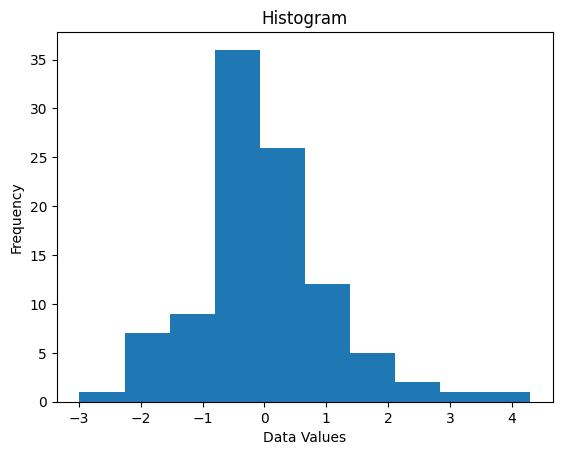

In [4]:


# Example: Creating a Histogram
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(100)  # Generate random data

fig, ax = plt.subplots()
ax.hist(data, bins=10)  # Create a histogram
ax.set_xlabel('Data Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram')
plt.show()


In [5]:
data

array([-3.72860498e-01,  4.14558446e-01, -3.04259015e-01, -8.68318990e-01,
        3.19194836e-01,  4.82653709e-01, -6.40543007e-01,  1.41588086e+00,
       -1.01893223e-01, -2.99111655e+00,  8.54449501e-01,  1.68520379e+00,
       -3.08425335e-01, -4.63078295e-01, -3.64081573e-01, -8.11791440e-01,
        1.61680548e-01,  3.07574226e-02, -1.79901440e+00, -3.20849522e-01,
        4.30099749e+00,  7.06666587e-04,  2.13159987e-01, -1.11810593e-01,
        5.48649685e-01,  3.41173460e-01,  6.50135237e-01, -7.28164555e-01,
       -9.91781382e-01, -1.88208932e-02, -7.67375284e-01,  1.22212297e+00,
        1.04797054e+00,  8.67513791e-01,  1.07148875e+00, -6.21626203e-01,
        1.08308293e+00, -4.40498471e-01, -1.21418687e+00, -5.05205205e-01,
       -5.07691382e-01,  2.73006558e+00,  9.65611102e-02,  5.67889053e-01,
       -3.58575901e-01,  4.74975121e-01, -7.30252391e-01, -1.90872692e-01,
        4.76036218e-01,  3.72175072e-01,  5.44759730e-01, -6.29030030e-01,
       -3.49462557e-01,  

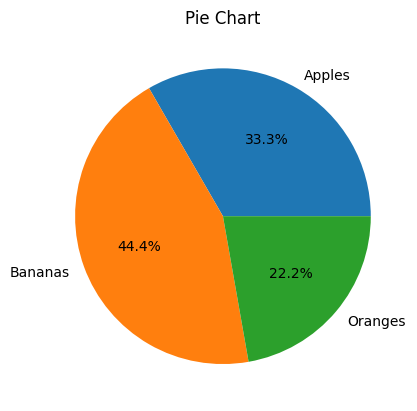

In [6]:
# prompt: create more steps for me

# Example: Creating a Pie Chart

labels = ['Apples', 'Bananas', 'Oranges']
sizes = [30, 40, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')  # Create a pie chart
ax.set_title('Pie Chart')
plt.show()



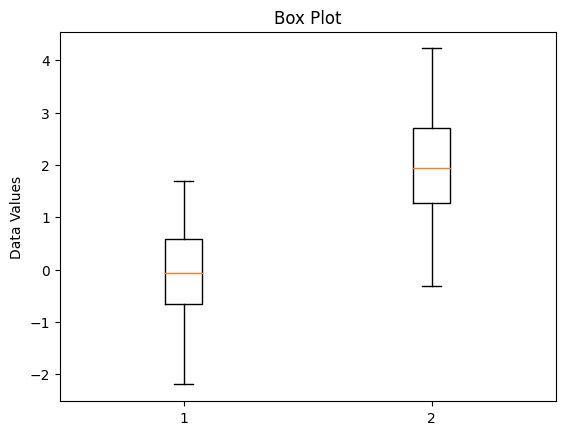

In [7]:

# Example: Creating a Box Plot

data = [np.random.normal(0, 1, 100), np.random.normal(2, 1, 100)]

fig, ax = plt.subplots()
ax.boxplot(data)  # Create a box plot
ax.set_ylabel('Data Values')
ax.set_title('Box Plot')
plt.show()



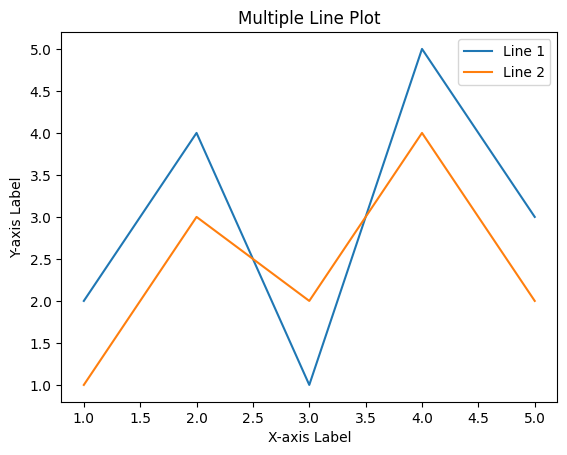

In [8]:

# Example: Creating a Line Plot with Multiple Lines

x = [1, 2, 3, 4, 5]
y1 = [2, 4, 1, 5, 3]
y2 = [1, 3, 2, 4, 2]

fig, ax = plt.subplots()
ax.plot(x, y1, label='Line 1')  # Plot the first line
ax.plot(x, y2, label='Line 2')  # Plot the second line
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Multiple Line Plot')
ax.legend()  # Add a legend to distinguish the lines
plt.show()


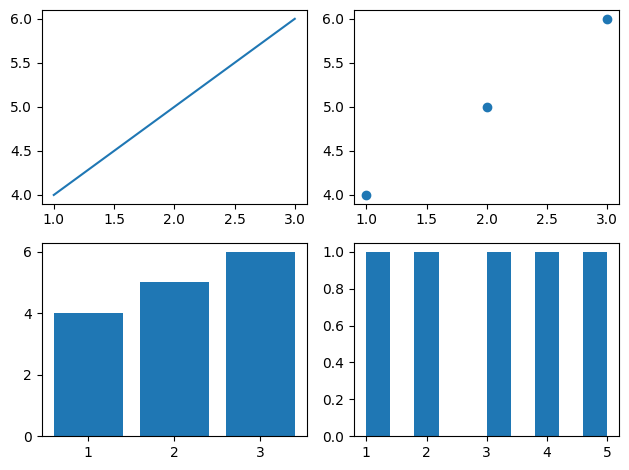

In [9]:


# Example: Creating a Subplot Grid

fig, axes = plt.subplots(2, 2)  # Create a 2x2 grid of subplots

axes[0, 0].plot([1, 2, 3], [4, 5, 6])  # Plot in the top-left subplot
axes[0, 1].scatter([1, 2, 3], [4, 5, 6])  # Plot in the top-right subplot
axes[1, 0].bar([1, 2, 3], [4, 5, 6])  # Plot in the bottom-left subplot
axes[1, 1].hist([1, 2, 3, 4, 5])  # Plot in the bottom-right subplot

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



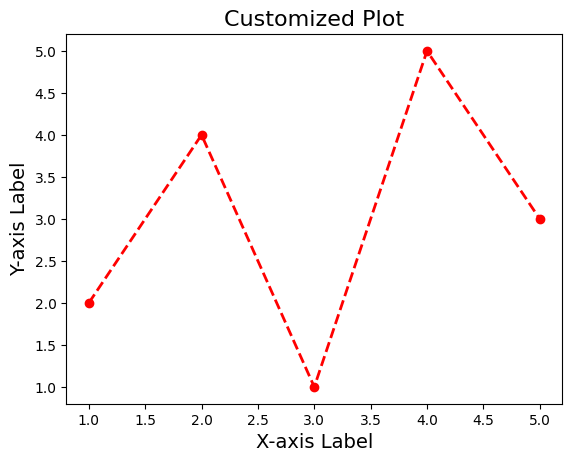

In [10]:

# Example: Customizing Plot Appearance

x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

fig, ax = plt.subplots()
ax.plot(x, y, color='red', linestyle='--', marker='o', linewidth=2)  # Customize line appearance
ax.set_xlabel('X-axis Label', fontsize=14)  # Customize label font size
ax.set_ylabel('Y-axis Label', fontsize=14)
ax.set_title('Customized Plot', fontsize=16)
plt.show()



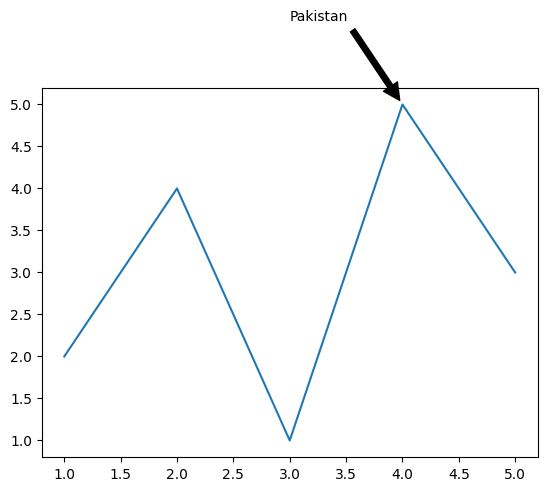

In [15]:

# Example: Adding Annotations

x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

fig, ax = plt.subplots()
ax.plot(x, y)
ax.annotate('Pakistan', xy=(4, 5), xytext=(3, 6), arrowprops=dict(facecolor='black', shrink=0.05))  # Add an annotation
plt.show()



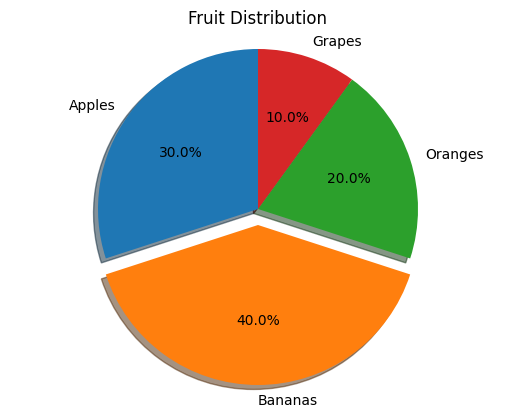

In [16]:
# prompt: generate pie chart but one slice should be some distance.

import matplotlib.pyplot as plt

# Sample data
labels = ['Apples', 'Bananas', 'Oranges', 'Grapes']
sizes = [30, 40, 20, 10]
explode = (0, 0.1, 0, 0)  # Explode the 2nd slice (Bananas)

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Fruit Distribution')
plt.show()


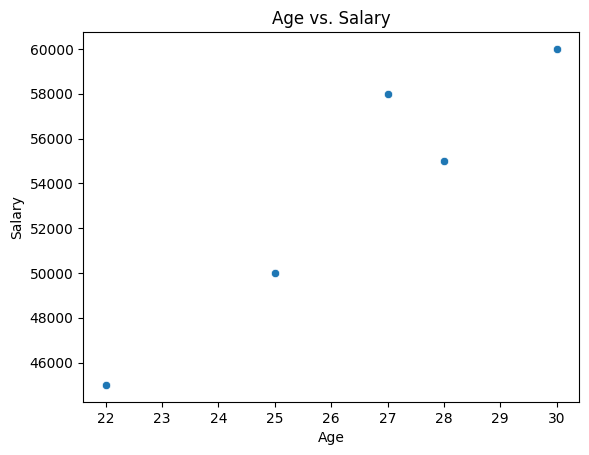

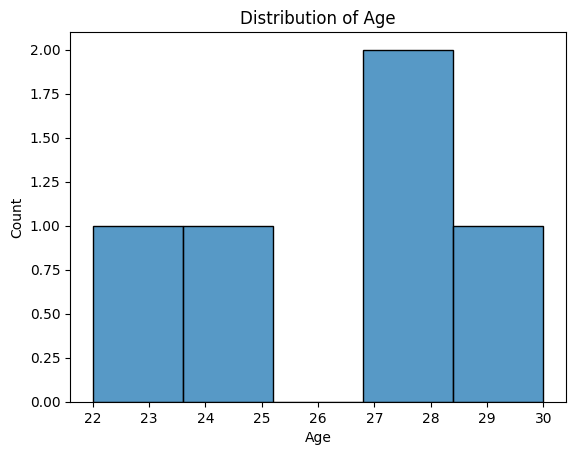

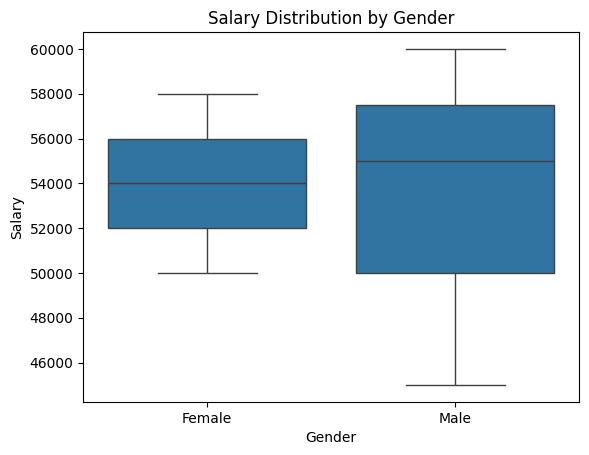

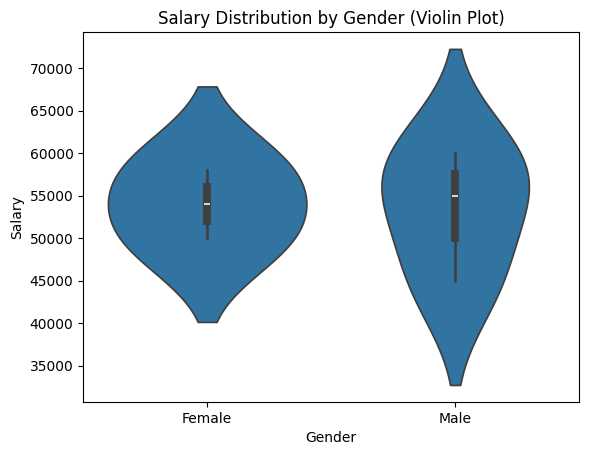

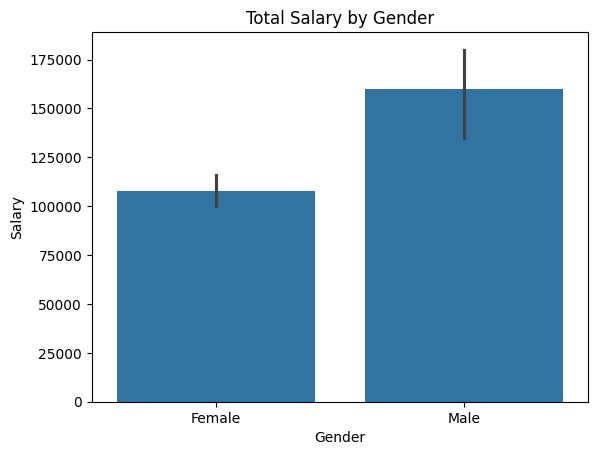

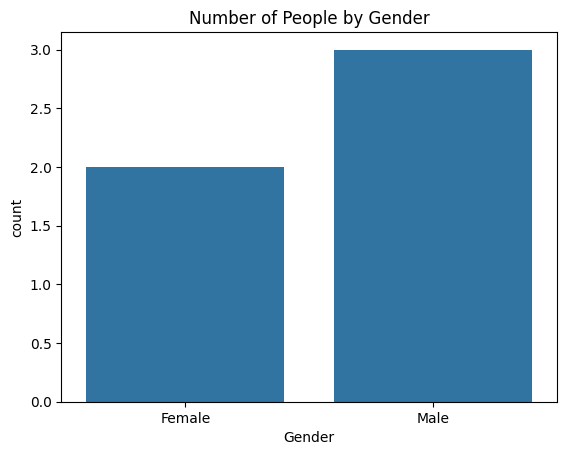

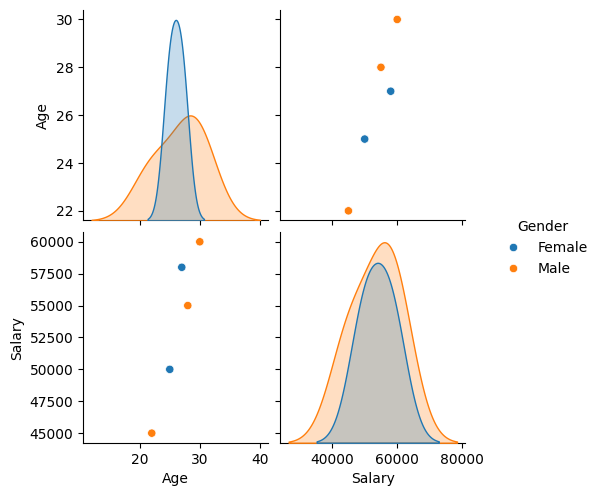

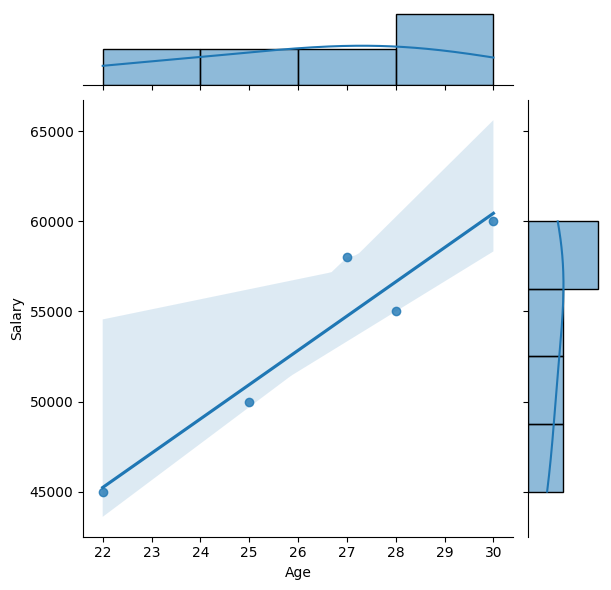

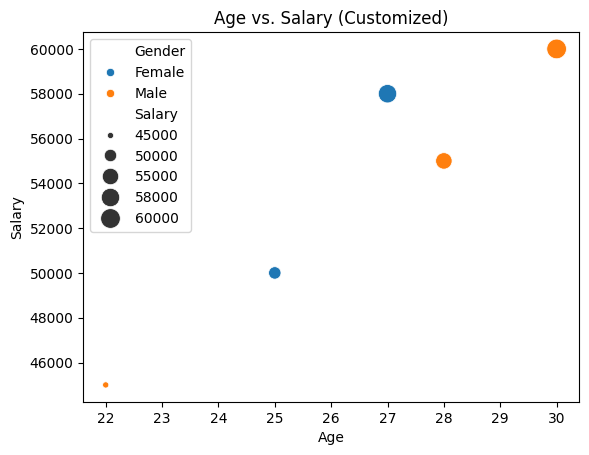

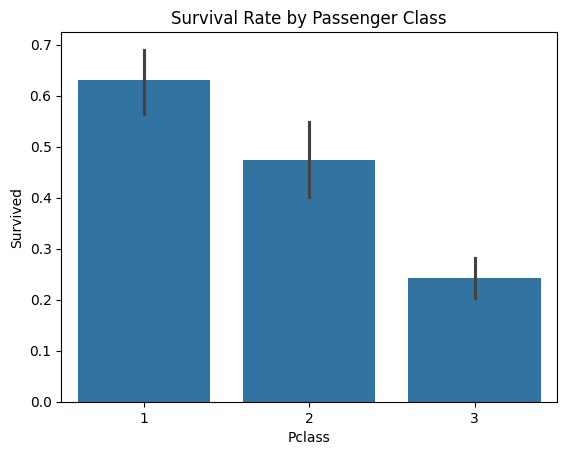

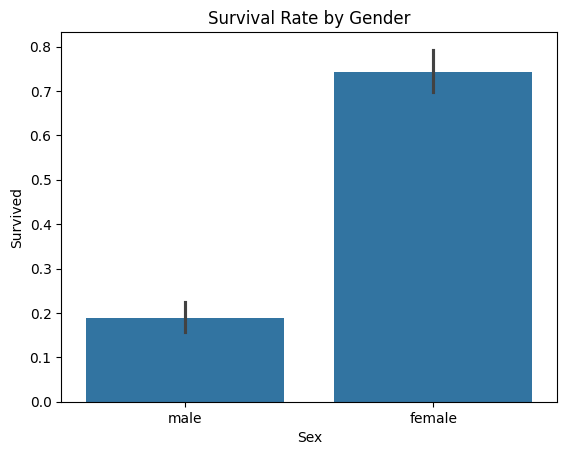

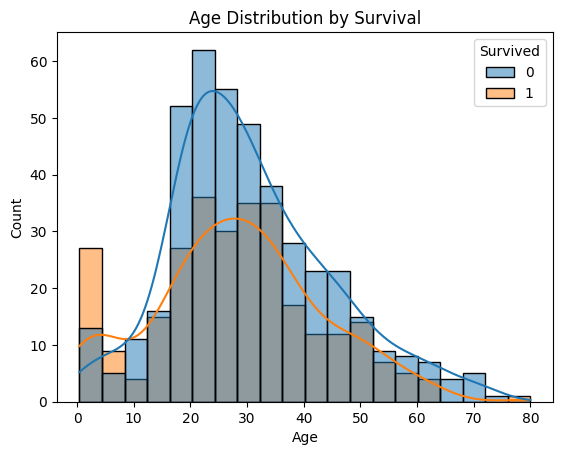

In [20]:
# prompt: Now i have to teach seaborn python package.

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 28, 22, 27],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 55000, 45000, 58000]
}
df = pd.DataFrame(data)

# 1. Scatter Plot with Seaborn
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs. Salary')
plt.show()

# 2. Histogram with Seaborn
sns.histplot(df['Age'], bins=5)
plt.title('Distribution of Age')
plt.show()

# 3. Box Plot with Seaborn
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

# 4. Violin Plot with Seaborn
sns.violinplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender (Violin Plot)')
plt.show()

# 5. Bar Plot with Seaborn
sns.barplot(x='Gender', y='Salary', data=df, estimator=sum)
plt.title('Total Salary by Gender')
plt.show()

# 6. Count Plot with Seaborn
sns.countplot(x='Gender', data=df)
plt.title('Number of People by Gender')
plt.show()

# # 7. Heatmap with Seaborn
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# 8. Pair Plot with Seaborn
sns.pairplot(df, hue='Gender')
plt.show()

# 9. Joint Plot with Seaborn
sns.jointplot(x='Age', y='Salary', data=df, kind='reg')
plt.show()

# 10. Customizing Seaborn Plots
sns.scatterplot(x='Age', y='Salary', data=df, hue='Gender', size='Salary', sizes=(20, 200))
plt.title('Age vs. Salary (Customized)')
plt.show()

# Example: Using Seaborn for Data Exploration (Titanic Dataset)
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Analyze survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Analyze survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

# Analyze the relationship between age and survival
sns.histplot(x='Age', hue='Survived', data=titanic_df, kde=True)
plt.title('Age Distribution by Survival')
plt.show()


In [21]:
# prompt: now i have to teach plotly pls create some steps

# Install plotly if not already installed
!pip install plotly

# Import necessary libraries
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 28, 22, 27],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'Salary': [50000, 60000, 55000, 45000, 58000]
}
df = pd.DataFrame(data)


# 1. Scatter Plot with Plotly Express
fig = px.scatter(df, x='Age', y='Salary', color='Gender', title='Age vs. Salary')
fig.show()


# 2. Bar Chart with Plotly Express
fig = px.bar(df, x='Gender', y='Salary', title='Total Salary by Gender')
fig.show()


# 3. Histogram with Plotly Express
fig = px.histogram(df, x='Age', title='Distribution of Age')
fig.show()


# 4. Box Plot with Plotly Express
fig = px.box(df, x='Gender', y='Salary', title='Salary Distribution by Gender')
fig.show()


# 5. Pie Chart with Plotly Express
fig = px.pie(df, names='Gender', values='Salary', title='Salary Distribution by Gender')
fig.show()


# 6. Line Plot with Plotly Express
# Create some sample time series data
df_time_series = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Value': [10, 12, 15, 11, 13, 16, 18, 17, 19, 20]
})
fig = px.line(df_time_series, x='Date', y='Value', title='Time Series Data')
fig.show()


# 7. Creating Interactive Plots with Plotly Graph Objects
# Sample data for a scatter plot
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create a scatter plot using go.Scatter
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))

# Customize the plot
fig.update_layout(
    title='Interactive Scatter Plot',
    xaxis_title='X-axis',
    yaxis_title='Y-axis'
)

fig.show()


# 8. Customizing Plotly Plots
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create a scatter plot
fig = px.scatter(x=x, y=y)

# Customize the plot
fig.update_traces(
    marker=dict(size=12, color='red'),  # Change marker size and color
    line=dict(width=2)  # Change line width
)

fig.update_layout(
    title='Customized Scatter Plot',
    xaxis_title='X-axis',
    yaxis_title='Y-axis',
    font=dict(size=14)  # Change font size
)

fig.show()


# 9. Adding Annotations
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create a scatter plot
fig = px.scatter(x=x, y=y)

# Add an annotation
fig.add_annotation(
    x=4,
    y=5,
    text='Pakistan',
    showarrow=True,
    arrowhead=1
)

fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

